# repurchase
* 時系列で分けずに学習させると、以前に購入したものを推薦する傾向が出るはず
* それを除くべきかどうか
* これを調べるまでもなく、直近に購入したものを推薦するだけで0.02を超えるので、基本的には覗かなくて良い

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import schema

In [2]:
transactions = pd.read_csv('input/transformed/transactions_train.csv', parse_dates=['t_dat'], usecols=list(schema.TRANSACTIONS.keys())+['t_dat'], dtype=schema.TRANSACTIONS)

In [63]:
# 同日は悪影響ないはずなので、異なる日付で何回現れるかを数える
transactions_wo_dup = transactions[['article_id_idx', 'customer_id_idx', 't_dat']].drop_duplicates()
a = transactions_wo_dup.groupby(['article_id_idx', 'customer_id_idx']).size().reset_index(name='cnt')

In [64]:
b = a.groupby('cnt').size().reset_index(name='freq')

In [65]:
b['cumsum_ratio'] = b.freq.cumsum() / b.freq.sum()

In [66]:
b

,cnt,freq,cumsum_ratio
0,1,26165223,0.958207
1,2,1040906,0.996327
2,3,82671,0.999354
3,4,12332,0.999806
4,5,3218,0.999923
5,6,1111,0.999964
6,7,471,0.999981
7,8,195,0.999989
8,9,119,0.999993
9,10,75,0.999996


96%のペアが一回のみ現れる

In [73]:
transactions_wo_dup['t_dat_shift'] = transactions_wo_dup.groupby(['article_id_idx', 'customer_id_idx'])['t_dat'].shift()

In [94]:
a = transactions_wo_dup[~transactions_wo_dup['t_dat_shift'].isnull()].reset_index(drop=True)
a['t_dat_diff'] = (a['t_dat'] - a['t_dat_shift']).dt.days


In [98]:
a['t_dat_diff'].value_counts()

1      134480
2      131695
3      106943
4       83687
5       64398
        ...  
719         1
725         1
729         1
730         1
728         1
Name: t_dat_diff, Length: 727, dtype: int64

<AxesSubplot:>

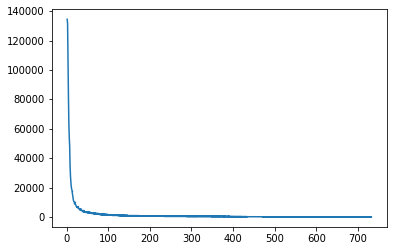

In [96]:
a['t_dat_diff'].value_counts().plot()

In [111]:
a['customer_id_idx'].value_counts().reset_index().customer_id_idx.value_counts().reset_index()

,index,customer_id_idx
0,1,161918
1,2,75988
2,3,41774
3,4,25909
4,5,17194
...,...,...
155,145,1
156,146,1
157,148,1
158,150,1
